In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.debug_leave_one_utility \
    import LeaveOne
from BrainEmbeddingPhase2.B2BNet.cluster_scoring import *
from BrainEmbeddingPhase2.B2BNet.cluster_scoring_utility import *

In [2]:
prob_matrices_results = get_prob_matrices(is_gauss='norm')

 85%|████████▍ | 183/216 [00:00<00:00, 897.72it/s]

is testing:False


100%|██████████| 216/216 [00:00<00:00, 908.37it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [3]:
diver_x_set_g1cent, \
        diver_x_set_g2cent = prob_matrices_results[-2:]

In [4]:
import pandas as pd

In [5]:
a1a3_clusters = prob_matrices_results[4]
typical_clusters = prob_matrices_results[5]
len_a1a3_clusters = len(a1a3_clusters)
len_typical_clusters = len(typical_clusters)

In [6]:

list_cluster_label = np.zeros(172)
for i in range(172):
    if i < 88:
        for cluster_idx in range(len_a1a3_clusters):
            if i in a1a3_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx
    if i >= 88:
        for cluster_idx in range(len_typical_clusters):
            if i-88 in typical_clusters[cluster_idx]:
                list_cluster_label[i] = cluster_idx +  len_a1a3_clusters 
                    
    



In [7]:
df_b_cents = pd.DataFrame(np.concatenate([diver_x_set_g1cent,diver_x_set_g2cent], axis=1))

In [8]:
df_list_cluster_label = pd.DataFrame(list_cluster_label)
df_b_cents_with_label = pd.concat([df_b_cents, df_list_cluster_label],axis=1) 

In [9]:
a1a3_argmin = np.argmin (df_b_cents.values[:, :len_a1a3_clusters], axis=1)
typical_argmin = np.argmin (df_b_cents.values[:, len_a1a3_clusters:], axis=1)+len_a1a3_clusters

In [10]:
universal_argmin = np.argmin (df_b_cents.values, axis=1)

In [11]:
list_argmin=np.concatenate([a1a3_argmin.reshape(-1,1),typical_argmin.reshape(-1,1)],axis=1)

In [12]:
list_argmin_ = np.concatenate([list_argmin, universal_argmin.reshape(-1,1)], axis=1)

In [13]:
df_list_argmin_ = pd.DataFrame(list_argmin_ )

In [14]:
df_b_cents_with_label_and_argmin_= pd.concat([df_b_cents_with_label, df_list_argmin_], axis=1)

In [15]:
universal_argmin

array([6, 9, 3, 9, 9, 9, 4, 9, 5, 2, 7, 3, 1, 6, 6, 9, 2, 7, 1, 2, 8, 2,
       9, 3, 2, 1, 2, 3, 3, 5, 2, 1, 0, 4, 9, 9, 0, 3, 3, 5, 7, 9, 3, 6,
       1, 4, 5, 1, 5, 9, 2, 7, 7, 0, 1, 3, 2, 2, 9, 1, 6, 3, 5, 3, 9, 4,
       2, 9, 1, 4, 9, 4, 9, 6, 5, 3, 1, 3, 3, 6, 4, 3, 8, 1, 1, 2, 3, 0,
       1, 9, 5, 9, 6, 5, 1, 7, 9, 7, 9, 4, 9, 9, 9, 5, 9, 4, 6, 9, 8, 7,
       3, 9, 3, 9, 5, 3, 6, 7, 6, 5, 5, 9, 1, 1, 6, 6, 6, 5, 1, 3, 4, 8,
       1, 9, 9, 6, 9, 2, 6, 5, 7, 7, 1, 5, 9, 5, 8, 5, 9, 8, 3, 9, 9, 6,
       9, 7, 3, 6, 5, 4, 3, 2, 5, 1, 4, 2, 8, 0, 9, 9, 9, 8])

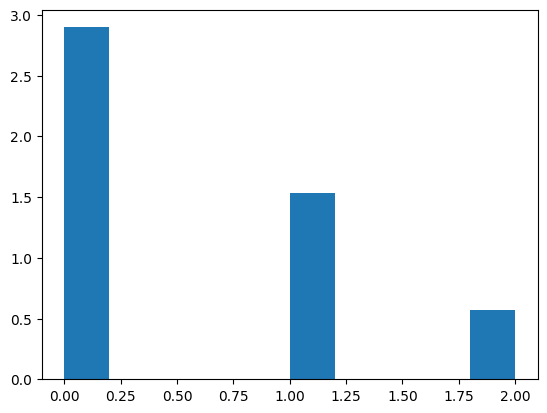

In [16]:
hist_smallest = []
for i in range(88):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[:88],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[:88][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()



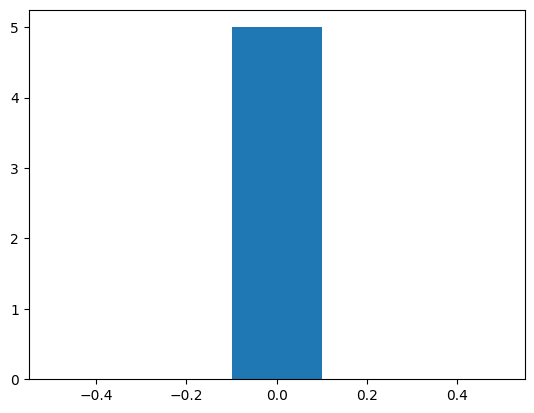

In [17]:
hist_smallest = []
sorted_diver_a1a3_cents  = np.argsort(df_b_cents.values[:88,:5],axis=1)
a1a3_labels_list = df_list_cluster_label.values.reshape(-1)[:88]
for i in range(88):
    hist_smallest.append(int(np.where(sorted_diver_a1a3_cents[i]  ==  a1a3_labels_list[i]) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

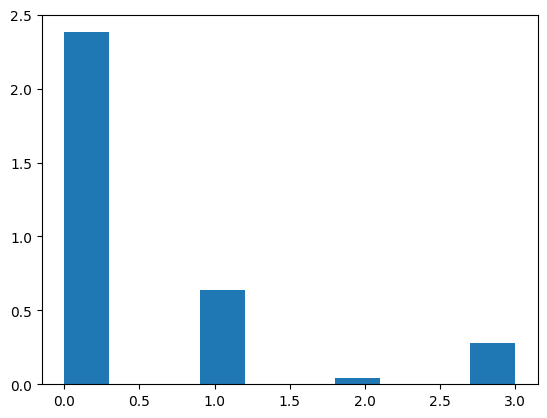

In [18]:
hist_smallest = []
for i in range(84):
    hist_smallest.append( int( np.where(np.argsort(df_b_cents.values[88:],axis=1)[i]  
                    ==  df_list_cluster_label.values.reshape(-1)[88:][i]) [0] ))
plt.hist(hist_smallest, density=True, bins=10)
plt.show()

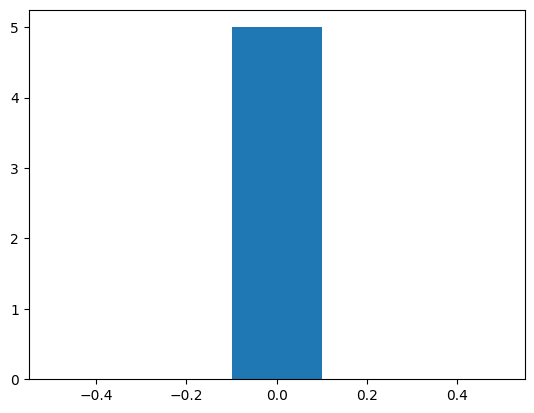

In [19]:
hist_smallest = []
sorted_diver_typical_cents  = np.argsort(df_b_cents.values[88:,5:],axis=1)
typical_labels_list = df_list_cluster_label.values.reshape(-1)[88:]
for i in range(84):
    hist_smallest.append(int(np.where(sorted_diver_typical_cents[i]  ==  typical_labels_list[i]-5) [0] ))

plt.hist(hist_smallest, density=True, bins=5)
plt.show()

In [20]:
# prefix = '/media/sophie/'
# experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

# df_b_cents_with_label_and_argmin_.to_excel(prefix+experiment_path +"divergence_from_hub_centroids_with_cluster_label00904.xlsx")

In [21]:
a1a3_g1cent_params, a1a3_g2cent_params, typical_g1cent_params, typical_g2cent_params = prob_matrices_results[-6:-2]

In [22]:
print(f"a1a3_clusters_to_a1a3_groups: \n {a1a3_g1cent_params} \n"
      f"a1a3_clusters_to_typical_groups: \n {a1a3_g2cent_params} \n" 
      f"typical_clusters_to_a1a3_groups: \n {typical_g1cent_params}\n"
      f"typical_clusters_to_typical_groups: \n {typical_g2cent_params}")

a1a3_clusters_to_a1a3_groups: 
 [[(4.381499650864382, 2.933017613890082), (6.603439602985424, 2.525218792911147), (5.07275063049231, 2.635374898384427), (5.184973952227193, 2.533028695275575), (5.119887327095003, 2.6153711406393567)], [(9.787165383958365, 3.677255692977538), (6.593595035574804, 3.2430145871432234), (11.37696651659602, 3.6661070744669746), (7.592909312922831, 3.341433905078715), (7.520935632296406, 3.153202876997794)], [(5.021890925416422, 2.3321464521903756), (8.40251948652235, 2.0884273759270164), (4.459749064986883, 2.5561739733579643), (6.672907981244599, 2.1061601523295885), (6.322052250317945, 2.2069828839040535)], [(7.7117126337360915, 3.2417688116424017), (7.4801251249665, 3.1247160337768167), (8.542722381788092, 3.0643216718141475), (6.703020598180375, 3.3923973202181004), (7.131004372849395, 3.241886490948518)], [(6.628733579708841, 3.1279710356688364), (6.394132256510893, 2.798390302630779), (7.84224658981153, 2.799588934703354), (5.83405233598657, 3.02088655

In [23]:
matrix_for_scoring, sample_weight= generate_prob_matrix_with_cluster_labels(
        *prob_matrices_results[:8], len_a1a3_group=88)

In [24]:
cate_reg_list, cate_reg_predict_list, \
cluster_reg_list, cluster_reg_predict_list = cluster_scoring_with_two_labels(matrix_for_scoring, sample_weight)
cate_predicted_score = np.array(cate_reg_predict_list).T
cluster_predicted_score = np.array(cluster_reg_predict_list).T

In [25]:
cate_input_score_in_a1a3 = cate_predicted_score[:,:len_a1a3_clusters]
cate_input_score_in_typical = cate_predicted_score[:,len_a1a3_clusters:]

In [26]:
cluster_input_score_in_a1a3 = cluster_predicted_score[:,:len_a1a3_clusters]
cluster_input_score_in_typical = cluster_predicted_score[:,len_a1a3_clusters:]

In [27]:
input_score_in_a1a3 = np.concatenate([cate_input_score_in_a1a3, cluster_input_score_in_a1a3], axis=1)
input_score_in_typical = np.concatenate([cate_input_score_in_typical, cluster_input_score_in_typical], axis=1)

In [28]:
np.shape(input_score_in_a1a3)

(172, 10)

In [29]:
df_cate_predicted_score= pd.DataFrame(cate_predicted_score)
df_cluster_predicted_score= pd.DataFrame(cluster_predicted_score)

In [30]:
# prefix = '/media/sophie/'
# experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
# len_samples = 172
# with pd.ExcelWriter(
#         prefix + experiment_path + "norm_Probability_matrix+#cluster_label+#category_label+predicted0905_v3.xlsx") as writer:
#     for i in range(len_samples):
#         this_table = \
#             np.concatenate([matrix_for_scoring[i,:,:], cate_predicted_score[i].reshape(-1,1), cluster_predicted_score[i].reshape(-1,1)], axis=1)
#         df_this_table=pd.DataFrame(this_table)
#         sheet_str = f"No.{i}"
#         df_this_table.to_excel(writer, sheet_name=sheet_str)

In [31]:

#df_cate_cluster_predcit = pd.concat([df_cate_predicted_score, df_cluster_predicted_score], axis = 1)

In [32]:
result = regression(np.array(input_score_in_typical),np.array(input_score_in_a1a3), 
                              len_a1a3_group=88, len_typical_group=84,
                              train_type="none")

In [33]:
print(result)

{'trained_clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 'accurate_count': 114, 'adhd_accurate_count': 60, 'typical_accurate_count': 54, 'predict_y': array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.

In [34]:
test_prob_matrices_results = get_prob_matrices(is_gauss='norm',is_testing=True)

  0%|          | 0/216 [00:00<?, ?it/s]

is testing:True


100%|██████████| 216/216 [00:00<00:00, 886.13it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)
a1a3_hubs:[32, 47, 57, 61, 71] 
typical_hubs:[15, 28, 29, 61, 81]


In [35]:
test_matrix_for_scoring, test_sample_weight= generate_prob_matrix_with_cluster_labels(
        *test_prob_matrices_results[:8],len_a1a3_group=88)

In [36]:
test_cate_reg_predict_list, test_cluster_reg_predict_list = \
    cluster_scoring_with_two_labels(test_matrix_for_scoring, sample_weight,\
                                    is_training=False, 
                                    trained_cate_reg_list=cate_reg_list,
                                    trained_cluster_reg_list=cluster_reg_list)
test_cate_predicted_score = np.array(test_cate_reg_predict_list).T
test_cluster_predicted_score = np.array(test_cluster_reg_predict_list).T

In [37]:
test_cate_input_score_in_a1a3 = test_cate_predicted_score[:,:len_a1a3_clusters]
test_cate_input_score_in_typical = test_cate_predicted_score[:,len_a1a3_clusters:]
test_cluster_input_score_in_a1a3 = test_cluster_predicted_score[:,:len_a1a3_clusters]
test_cluster_input_score_in_typical = test_cluster_predicted_score[:,len_a1a3_clusters:]

In [38]:
test_input_score_in_a1a3 = np.concatenate([test_cate_input_score_in_a1a3, test_cluster_input_score_in_a1a3], axis=1)
test_input_score_in_typical = np.concatenate([test_cate_input_score_in_typical, test_cluster_input_score_in_typical], axis=1)

In [39]:
test_result = regression(np.array(test_input_score_in_a1a3), np.array(test_input_score_in_typical),
                              len_a1a3_group=88, len_typical_group=84,
                              train_type="none")

In [40]:
print(test_result)

{'trained_clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False), 'accurate_count': 114, 'adhd_accurate_count': 60, 'typical_accurate_count': 54, 'predict_y': array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.

In [41]:
np.shape(matrix_for_scoring)

(172, 10, 12)

In [42]:
np.shape(sample_weight)

(172, 10)

In [43]:
# prefix = '/media/sophie/'
# experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
# with pd.ExcelWriter(
#         prefix + experiment_path + "norm_Probability_matrix_by_cluster+#cluster_label+#category_label+predicted0905_weight.xlsx") as writer:
#     for i in range(len_a1a3_clusters+len_typical_clusters):
#         matrix_by_cluster= np.concatenate([matrix_for_scoring[:,i,:],
#                                            np.array(cate_reg_predict_list)[i,:].reshape(-1,1),
#                                            np.array(cluster_reg_predict_list)[i,:].reshape(-1,1),
#                                            sample_weight[:,i].reshape(-1,1),
#                                           ],axis=1)
#         df_this_table = pd.DataFrame(matrix_by_cluster)
#         sheet_str = f"cluster.{i}"
#         df_this_table.to_excel(writer, sheet_name=sheet_str) 
        

In [44]:
df_sample_weight = pd.DataFrame(sample_weight)

In [45]:
df_sample_weight.values[list(a1a3_clusters[0])]

array([[160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.],
       [160.,  16.,  21.,  25.,  14.,  16.,  11.,  14.,  14.,  29.]])

In [46]:
for i in range(10):
    print(f"w for cluster{i} \n"
          f"{cluster_reg_list[i].coef_ }\n"
          f"b for cluster{i} \n"
          f"{cluster_reg_list[i].intercept_}"
         )

w for cluster0 
[ -7.84177177   1.38060448  24.38118989   3.87378318 -18.99726179
  -6.77535798  -8.34128182   2.30350183   6.87095208   7.56088164]
b for cluster0 
-0.5224349905032232
w for cluster1 
[-23.30198227 -18.2050149   19.0707947   21.47752847  32.03363794
  11.94570463   8.55138949   5.15992114 -17.45319887 -36.76122946]
b for cluster1 
-0.43893863192062943
w for cluster2 
[  0.07963437  -1.81040114   1.14854018  25.8442104  -16.47679953
  11.11659559  -2.63181727   4.07745862 -11.86920275   0.5862021 ]
b for cluster2 
-0.8795082509725527
w for cluster3 
[  0.56169011   4.63857916   9.37567214 -27.18027321   3.4532041
   5.59832853   2.10176996   7.93099375  -6.6946556    4.855624  ]
b for cluster3 
-0.23809958112079183
w for cluster4 
[-19.42633971   2.00008462  27.43357164 -12.71618856  -9.39603801
 -14.8385253    0.57063978   4.43967606  -5.65417284  27.61037243]
b for cluster4 
0.027233811167243882
w for cluster5 
[-0.73340638 -0.56791373  1.51790576  0.06377672 -1.55965

In [47]:
# prefix = '/media/sophie/'
# experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
# with pd.ExcelWriter(
#         prefix + experiment_path + "norm_Probability_matrix_by_cluster_row_0907.xlsx") as writer:
#     for i in range(len_a1a3_clusters+len_typical_clusters):
#         matrix_by_cluster= np.concatenate([matrix_for_scoring[:,i,:], cluster_label_list.reshape(-1,1)],axis=1)
#         df_this_table = pd.DataFrame(matrix_by_cluster)
#         sheet_str = f"cluster.{i}"
#         df_this_table.to_excel(writer, sheet_name=sheet_str) 

In [48]:
cluster_label_list = np.zeros(172)
cluster_idx =0
for cluster in a1a3_clusters:
    cluster_label_list[list(cluster)] = cluster_idx
    cluster_idx+=1
for cluster in typical_clusters:
    cluster_label_list[np.array(list(cluster))+88] = cluster_idx
    cluster_idx+=1
    

In [49]:
cluster_label_list


array([2., 3., 3., 3., 4., 4., 4., 0., 2., 2., 1., 3., 1., 2., 3., 3., 2.,
       1., 1., 2., 3., 2., 0., 3., 2., 1., 2., 3., 3., 2., 2., 1., 0., 4.,
       0., 4., 0., 3., 3., 2., 4., 4., 3., 0., 1., 4., 0., 1., 2., 4., 2.,
       1., 1., 0., 1., 3., 2., 2., 0., 1., 3., 3., 2., 3., 4., 4., 2., 0.,
       1., 4., 0., 4., 3., 2., 2., 3., 1., 3., 3., 3., 4., 3., 3., 1., 1.,
       2., 3., 0., 7., 9., 5., 9., 6., 5., 7., 7., 9., 7., 9., 7., 9., 9.,
       9., 5., 9., 9., 6., 9., 8., 7., 8., 9., 8., 9., 5., 8., 6., 7., 6.,
       5., 5., 9., 8., 7., 6., 6., 6., 5., 8., 8., 9., 8., 7., 9., 9., 6.,
       9., 5., 6., 5., 7., 7., 7., 5., 9., 5., 8., 5., 9., 8., 9., 9., 9.,
       6., 9., 7., 8., 6., 5., 9., 8., 5., 5., 7., 9., 5., 8., 9., 9., 9.,
       9., 8.])

In [50]:
# prefix = '/media/sophie/'
# experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
# with pd.ExcelWriter(
#         prefix + experiment_path + "norm_Probability_matrix_by_cluster_col_0907.xlsx") as writer:
#     for i in range(len_a1a3_clusters+len_typical_clusters):
#         matrix_by_cluster= np.concatenate([matrix_for_scoring[:,:,i], matrix_for_scoring[:,i,-1].reshape(-1,1), cluster_label_list.reshape(-1,1)],axis=1)
#         df_this_table = pd.DataFrame(matrix_by_cluster)
#         sheet_str = f"centroid.{i}"
#         df_this_table.to_excel(writer, sheet_name=sheet_str) 

In [51]:
len_a1a3_clusters

5

In [52]:
np.shape(matrix_for_scoring[:,i,-1].reshape(-1,1))

(172, 1)

In [53]:
from BrainEmbeddingPhase2.B2BNet.CNN_utility import *
import keras

Using TensorFlow backend.


In [54]:
keras.backend.clear_session()
model_for_training = create_model()

W0912 02:17:24.149420 140260342339392 deprecation_wrapper.py:119] From /home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0912 02:17:24.150279 140260342339392 deprecation_wrapper.py:119] From /home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0912 02:17:24.176146 140260342339392 deprecation_wrapper.py:119] From /home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0912 02:17:24.177451 140260342339392 deprecation_wrapper.py:119] From /home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/keras/back

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 1280)        12800     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 720)         8295120   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 320)         2073920   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 80)          230480    
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3210      
Total params: 10,615,530
Trainable params: 10,615,530
Non-trainable params: 0
________________________________________________________________

In [55]:
np.shape(matrix_for_scoring)

(172, 10, 12)

In [56]:
X= matrix_for_scoring[:,:,:-2]
y= np.zeros((172,len_a1a3_clusters+ len_typical_clusters))

In [57]:
#for idx in range(172):
#    y[idx, int(cluster_label_list[idx])] = 1

In [58]:
from keras.utils import to_categorical
#one-hot encode target column
y_cluster = to_categorical(cluster_label_list)


In [59]:
#cate_list = np.zeros(172)
#cate_list[88:] = 1 
#y = np.concatenate([cate_list.reshape(-1,1), y_cluster], axis=1)

In [60]:
y = y_cluster
np.shape(y)

(172, 10)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=cluster_label_list)

In [66]:
np.sum(y_train, axis=0)

array([ 9., 13., 17., 20., 11., 13.,  9., 11., 11., 23.], dtype=float32)

In [67]:
np.sum(y_test, axis=0)

array([3., 3., 4., 5., 3., 3., 2., 3., 3., 6.], dtype=float32)

In [68]:
#reshape data to fit model
x_train = x_train.reshape(*np.shape(x_train),1)
x_test = x_test.reshape(*np.shape(x_test),1)
# y_train = y_train.reshape(*np.shape(y_train),1)
# y_test = y_test.reshape(*np.shape(y_test),1)

In [69]:
np.shape(x_train)

(137, 10, 10, 1)

In [70]:
np.shape(y_train)

(137, 10)

In [71]:
model_for_training.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500)

W0912 02:18:51.763957 140260342339392 deprecation.py:323] From /home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 137 samples, validate on 35 samples
Epoch 1/500
137/137 [==============================] - 4s 32ms/step - loss: 2.3065 - acc: 0.1314 - val_loss: 2.2511 - val_acc: 0.1714
Epoch 2/500
137/137 [==============================] - 4s 30ms/step - loss: 2.2475 - acc: 0.1679 - val_loss: 2.2303 - val_acc: 0.1714
Epoch 3/500
137/137 [==============================] - 4s 28ms/step - loss: 2.1792 - acc: 0.1752 - val_loss: 2.1334 - val_acc: 0.2571
Epoch 4/500
137/137 [==============================] - 4s 27ms/step - loss: 2.1246 - acc: 0.2409 - val_loss: 2.0514 - val_acc: 0.2571
Epoch 5/500
137/137 [==============================] - 4s 26ms/step - loss: 2.0205 - acc: 0.2263 - val_loss: 1.9654 - val_acc: 0.2857
Epoch 6/500
137/137 [==============================] - 4s 27ms/step - loss: 1.8743 - acc: 0.2920 - val_loss: 1.9117 - val_acc: 0.2286
Epoch 7/500
137/137 [==============================] - 4s 27ms/step - loss: 1.7859 - acc: 0.2701 - val_loss: 1.8171 - val_acc: 0.2571
Epoch 8/500
137/1

137/137 [==============================] - 4s 27ms/step - loss: 0.1871 - acc: 0.9489 - val_loss: 3.3870 - val_acc: 0.3429
Epoch 62/500
137/137 [==============================] - 4s 27ms/step - loss: 0.1626 - acc: 0.9343 - val_loss: 2.9890 - val_acc: 0.4571
Epoch 63/500
137/137 [==============================] - 4s 27ms/step - loss: 0.2017 - acc: 0.9270 - val_loss: 3.4215 - val_acc: 0.3714
Epoch 64/500
137/137 [==============================] - 4s 27ms/step - loss: 0.1390 - acc: 0.9489 - val_loss: 3.6630 - val_acc: 0.3714
Epoch 65/500
137/137 [==============================] - 4s 27ms/step - loss: 0.1068 - acc: 0.9708 - val_loss: 3.4009 - val_acc: 0.4286
Epoch 66/500
137/137 [==============================] - 4s 27ms/step - loss: 0.1141 - acc: 0.9562 - val_loss: 3.3135 - val_acc: 0.4000
Epoch 67/500
137/137 [==============================] - 4s 27ms/step - loss: 0.0933 - acc: 0.9781 - val_loss: 3.9004 - val_acc: 0.3429
Epoch 68/500
137/137 [==============================] - 4s 27ms/step

137/137 [==============================] - 4s 27ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 5.3667 - val_acc: 0.3429
Epoch 122/500
137/137 [==============================] - 4s 27ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.4328 - val_acc: 0.3429
Epoch 123/500
137/137 [==============================] - 4s 26ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.4492 - val_acc: 0.3429
Epoch 124/500
137/137 [==============================] - 4s 27ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.4503 - val_acc: 0.3429
Epoch 125/500
137/137 [==============================] - 4s 27ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.4352 - val_acc: 0.3429
Epoch 126/500
137/137 [==============================] - 4s 26ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 5.4170 - val_acc: 0.3429
Epoch 127/500
137/137 [==============================] - 4s 26ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.4339 - val_acc: 0.3429
Epoch 128/500
137/137 [==============================] - 4s 27

Epoch 181/500
137/137 [==============================] - 4s 26ms/step - loss: 6.8574e-04 - acc: 1.0000 - val_loss: 5.8510 - val_acc: 0.3429
Epoch 182/500
137/137 [==============================] - 4s 27ms/step - loss: 7.0311e-04 - acc: 1.0000 - val_loss: 5.8696 - val_acc: 0.3429
Epoch 183/500
137/137 [==============================] - 4s 27ms/step - loss: 6.9795e-04 - acc: 1.0000 - val_loss: 5.8922 - val_acc: 0.3429
Epoch 184/500
137/137 [==============================] - 4s 27ms/step - loss: 6.5801e-04 - acc: 1.0000 - val_loss: 5.8878 - val_acc: 0.3429
Epoch 185/500
137/137 [==============================] - 4s 27ms/step - loss: 6.8016e-04 - acc: 1.0000 - val_loss: 5.8791 - val_acc: 0.3429
Epoch 186/500
137/137 [==============================] - 4s 27ms/step - loss: 6.9105e-04 - acc: 1.0000 - val_loss: 5.8979 - val_acc: 0.3429
Epoch 187/500
137/137 [==============================] - 4s 26ms/step - loss: 6.4637e-04 - acc: 1.0000 - val_loss: 5.9280 - val_acc: 0.3429
Epoch 188/500
137/13

137/137 [==============================] - 4s 27ms/step - loss: 3.5504e-04 - acc: 1.0000 - val_loss: 6.1798 - val_acc: 0.3429
Epoch 240/500
137/137 [==============================] - 4s 27ms/step - loss: 3.4696e-04 - acc: 1.0000 - val_loss: 6.1771 - val_acc: 0.3429
Epoch 241/500
137/137 [==============================] - 4s 27ms/step - loss: 3.3788e-04 - acc: 1.0000 - val_loss: 6.1708 - val_acc: 0.3429
Epoch 242/500
137/137 [==============================] - 4s 27ms/step - loss: 3.3790e-04 - acc: 1.0000 - val_loss: 6.1646 - val_acc: 0.3429
Epoch 243/500
137/137 [==============================] - 4s 27ms/step - loss: 3.3655e-04 - acc: 1.0000 - val_loss: 6.1657 - val_acc: 0.3429
Epoch 244/500
137/137 [==============================] - 4s 26ms/step - loss: 3.3352e-04 - acc: 1.0000 - val_loss: 6.1746 - val_acc: 0.3429
Epoch 245/500
137/137 [==============================] - 4s 27ms/step - loss: 3.2689e-04 - acc: 1.0000 - val_loss: 6.1672 - val_acc: 0.3429
Epoch 246/500
137/137 [===========

137/137 [==============================] - 4s 26ms/step - loss: 2.0882e-04 - acc: 1.0000 - val_loss: 6.3636 - val_acc: 0.3429
Epoch 298/500
137/137 [==============================] - 4s 27ms/step - loss: 2.0655e-04 - acc: 1.0000 - val_loss: 6.3564 - val_acc: 0.3429
Epoch 299/500
137/137 [==============================] - 4s 27ms/step - loss: 2.0443e-04 - acc: 1.0000 - val_loss: 6.3618 - val_acc: 0.3429
Epoch 300/500
137/137 [==============================] - 4s 27ms/step - loss: 2.0390e-04 - acc: 1.0000 - val_loss: 6.3836 - val_acc: 0.3429
Epoch 301/500
137/137 [==============================] - 4s 26ms/step - loss: 2.0168e-04 - acc: 1.0000 - val_loss: 6.3856 - val_acc: 0.3429
Epoch 302/500
137/137 [==============================] - 4s 27ms/step - loss: 2.0066e-04 - acc: 1.0000 - val_loss: 6.3807 - val_acc: 0.3429
Epoch 303/500
137/137 [==============================] - 4s 27ms/step - loss: 1.9701e-04 - acc: 1.0000 - val_loss: 6.3726 - val_acc: 0.3429
Epoch 304/500
137/137 [===========

137/137 [==============================] - 4s 27ms/step - loss: 1.3730e-04 - acc: 1.0000 - val_loss: 6.5186 - val_acc: 0.3429
Epoch 356/500
137/137 [==============================] - 4s 27ms/step - loss: 1.3658e-04 - acc: 1.0000 - val_loss: 6.5212 - val_acc: 0.3429
Epoch 357/500
137/137 [==============================] - 4s 27ms/step - loss: 1.3504e-04 - acc: 1.0000 - val_loss: 6.5385 - val_acc: 0.3429
Epoch 358/500
137/137 [==============================] - 4s 27ms/step - loss: 1.3498e-04 - acc: 1.0000 - val_loss: 6.5394 - val_acc: 0.3429
Epoch 359/500
137/137 [==============================] - 4s 26ms/step - loss: 1.3410e-04 - acc: 1.0000 - val_loss: 6.5386 - val_acc: 0.3429
Epoch 360/500
137/137 [==============================] - 4s 27ms/step - loss: 1.3198e-04 - acc: 1.0000 - val_loss: 6.5357 - val_acc: 0.3429
Epoch 361/500
137/137 [==============================] - 4s 27ms/step - loss: 1.3563e-04 - acc: 1.0000 - val_loss: 6.5350 - val_acc: 0.3429
Epoch 362/500
137/137 [===========

137/137 [==============================] - 4s 27ms/step - loss: 9.6442e-05 - acc: 1.0000 - val_loss: 6.6714 - val_acc: 0.3429
Epoch 414/500
137/137 [==============================] - 4s 27ms/step - loss: 9.6359e-05 - acc: 1.0000 - val_loss: 6.6617 - val_acc: 0.3429
Epoch 415/500
137/137 [==============================] - 4s 27ms/step - loss: 9.5412e-05 - acc: 1.0000 - val_loss: 6.6564 - val_acc: 0.3429
Epoch 416/500
137/137 [==============================] - 4s 26ms/step - loss: 9.4614e-05 - acc: 1.0000 - val_loss: 6.6597 - val_acc: 0.3429
Epoch 417/500
137/137 [==============================] - 4s 27ms/step - loss: 9.4261e-05 - acc: 1.0000 - val_loss: 6.6656 - val_acc: 0.3429
Epoch 418/500
137/137 [==============================] - 4s 27ms/step - loss: 9.3606e-05 - acc: 1.0000 - val_loss: 6.6678 - val_acc: 0.3429
Epoch 419/500
137/137 [==============================] - 4s 27ms/step - loss: 9.2980e-05 - acc: 1.0000 - val_loss: 6.6685 - val_acc: 0.3429
Epoch 420/500
137/137 [===========

137/137 [==============================] - 4s 26ms/step - loss: 7.1038e-05 - acc: 1.0000 - val_loss: 6.7378 - val_acc: 0.3429
Epoch 472/500
137/137 [==============================] - 4s 27ms/step - loss: 6.9807e-05 - acc: 1.0000 - val_loss: 6.7410 - val_acc: 0.3429
Epoch 473/500
137/137 [==============================] - 4s 26ms/step - loss: 6.9365e-05 - acc: 1.0000 - val_loss: 6.7395 - val_acc: 0.3429
Epoch 474/500
137/137 [==============================] - 4s 26ms/step - loss: 6.9025e-05 - acc: 1.0000 - val_loss: 6.7329 - val_acc: 0.3429
Epoch 475/500
137/137 [==============================] - 4s 27ms/step - loss: 6.8939e-05 - acc: 1.0000 - val_loss: 6.7292 - val_acc: 0.3429
Epoch 476/500
137/137 [==============================] - 4s 27ms/step - loss: 6.8610e-05 - acc: 1.0000 - val_loss: 6.7314 - val_acc: 0.3429
Epoch 477/500
137/137 [==============================] - 4s 26ms/step - loss: 6.8537e-05 - acc: 1.0000 - val_loss: 6.7307 - val_acc: 0.3429
Epoch 478/500
137/137 [===========

In [63]:
test_predict_result = model_for_training.predict(x_train)

NameError: name 'x_train' is not defined

In [82]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
df_test_predict_result = pd.DataFrame(test_predict_result)
df_y_train = pd.DataFrame(y_train)

In [84]:
df_train_table = pd.concat([df_test_predict_result, df_y_train],axis=1)

In [85]:
prefix = '/media/sophie/'
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'
df_train_table.to_excel(prefix + experiment_path + "CNN_137trained_500epochs_training_resluts_0912.xlsx")

In [86]:
x_idx_list = np.argmax(test_predict_result,axis=1)

In [87]:
x_cate_list = test_predict_result[:,0]

In [88]:
x_cate_list

array([1.72730455e-10, 1.79868953e-10, 6.32700337e-09, 1.09623639e-14,
       1.10675260e-12, 8.37184655e-10, 2.90858032e-11, 3.33884657e-07,
       3.13743015e-15, 7.94934465e-11, 3.16413666e-11, 1.87511080e-06,
       6.34546059e-14, 2.30855221e-05, 9.99959116e-10, 1.91179428e-09,
       3.88379209e-02, 3.90131447e-07, 3.25581223e-01, 2.85634189e-04,
       1.69170266e-06, 2.73082357e-08, 8.98885740e-12, 2.46258541e-10,
       1.31057512e-10, 1.05680542e-09, 9.69530706e-12, 1.41143865e-13,
       1.60080575e-07, 7.97266637e-07, 1.03278775e-02, 1.81968106e-04,
       1.78827135e-12, 5.16328328e-07, 4.90083585e-10, 3.96688774e-05,
       2.25300505e-06, 4.17412259e-03, 5.31461524e-07, 2.89720873e-07,
       5.11972187e-03, 3.98675972e-08, 7.46067097e-11, 5.14687599e-05,
       1.26344497e-12, 5.38853460e-14, 2.42242715e-14, 1.66551388e-07,
       1.45484250e-11, 1.33235831e-08, 4.34533256e-04, 2.36839727e-02,
       9.79158223e-01, 2.93706253e-04, 2.08068993e-10, 2.22967163e-01,
      

In [89]:
y_test [:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0.], dtype=float32)

In [90]:
y_idx_list = np.where(y_test ==1)[1]

In [91]:
# np.count_nonzero(np.abs(y_idx_list - x_idx_list) <= 4)

In [97]:
testing_predict_result = model_for_training.predict(x_test)
test_x_idx_list = np.argmax(testing_predict_result,axis=1)

In [98]:
print(test_x_idx_list)

[7 1 7 5 2 4 1 3 5 2 6 3 2 5 8 6 1 5 4 8 9 3 9 0 2 8 6 6 1 9 7 3 7 3 4]


In [93]:
print(y_idx_list)

[7 1 1 5 2 4 1 4 5 6 6 8 2 2 3 0 4 5 9 3 9 3 9 0 2 8 3 9 9 0 7 8 7 9 3]
